In [174]:
import pandas as pd
import os
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


TheData = pd.read_csv("/Users/matasgrikinis/PycharmProjects/AdmissionLikelihood/Admission_likelihood/AdmissionFile.csv")
TheData.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [175]:
TheData.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [176]:
TheData.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<AxesSubplot:>

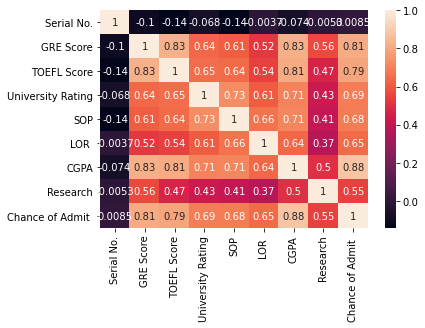

In [177]:
# Checking for high correlation between variables
corrMatrix = TheData.corr()
sn.heatmap(corrMatrix, annot=True)

In [178]:
print(TheData.columns.tolist())

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [179]:
# Renaming the labels of columns for convienience
TheData = TheData.rename(columns={"LOR ": "LOR", "Chance of Admit ": "COA"})

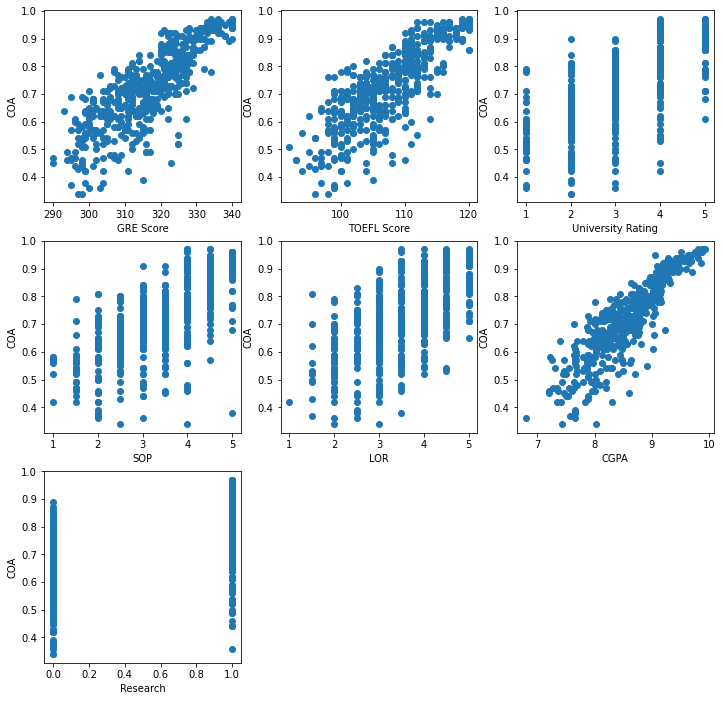

<function matplotlib.pyplot.clf()>

In [180]:
# The names of independent variables
IndependentVar = ["GRE Score" , "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"]

# Scatter plots of each independent variable and Chance of Admission to visually understand the impact
plt.subplots(figsize=(12, 12))

n = 1
for i in IndependentVar:
    plt.subplot(3,3,n)
    plt.scatter(TheData[i], TheData["COA"])
    plt.xlabel(i)
    plt.ylabel("COA")
    n += 1

plt.show()
plt.clf

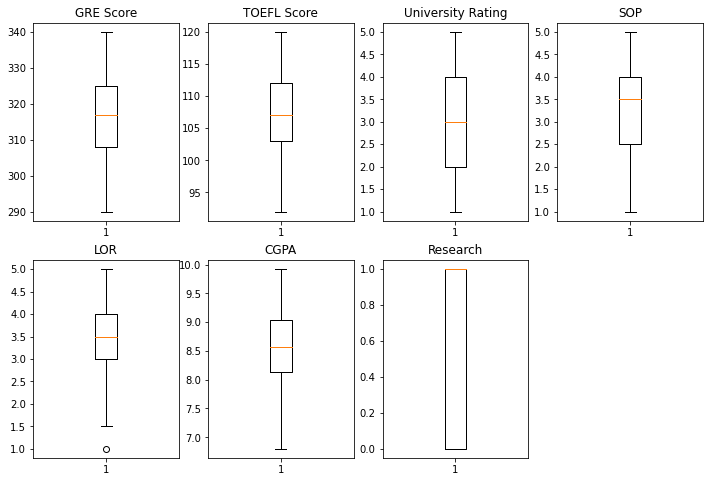

In [181]:
#Checking for outliers
plt.subplots(figsize=(12, 8))

n = 1
for i in IndependentVar:
    plt.subplot(2,4,n)
    plt.boxplot(TheData[i])
    plt.title(i)
    n += 1

In [182]:
# There are no outliers that could make a significant impact to the output
import statsmodels.api as sm

# OLS model to test H0: Betas = 0
x = TheData[IndependentVar]
y = TheData["COA"]

x = sm.add_constant(x)

OLSmodel = sm.OLS(y, x).fit()
Y_fit2 = OLSmodel.predict(x) 
 
OLSOut = OLSmodel.summary()
OLSOut

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    COA   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Thu, 01 Apr 2021   Prob (F-statistic):          8.21e-180
Time:                        23:28:22   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.104    -12.232      0.000      -1.481      -1.071
GRE Score             0.0019      0.001      3.700      0.000       0.001       0.003
TOEFL Score           0.0028      0.001      3.184      0.002       0.001       0.004
University Rating     0.0059      0.004      1.563      0.119      -0.002       0.013
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.011
LOR                   0.0169      0.004      4.074      0.000       0.009       0.025
CGPA                  0.1184      0.010     12.198      0.000       0.099       0.137
Research              0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
# From OLS output, one can see that the coefficient of "SOP"
# is statistically insignificant (fail to reject the null), hence the drop
x = x.drop(columns = "SOP")


Text(0, 0.5, 'Fitted Values')

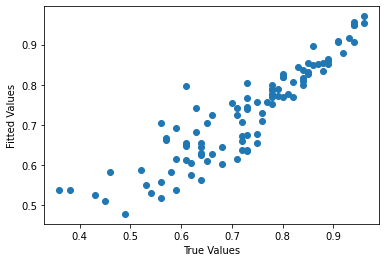

In [184]:
#Training and testing the data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=23)

model.fit(X_train, Y_train)
Y_fit = model.predict(X_test)

plt.scatter(Y_test, Y_fit)

plt.xlabel("True Values")
plt.ylabel("Fitted Values")

In [185]:
Coef_list = list(zip(x.columns, model.coef_ ))

print("Coefficients:")
for i in Coef_list:
    print(i)


Coefficients:
('const', 0.0)
('GRE Score', 0.0018147190620429793)
('TOEFL Score', 0.002819347990178742)
('University Rating', 0.007847827385830203)
('LOR', 0.012953293787897243)
('CGPA', 0.12262772667181362)
('Research', 0.02087033838872586)


In [186]:
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_fit))
RMSE

0.05664590460361824

<BarContainer object of 6 artists>

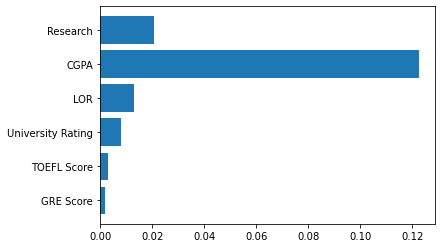

In [188]:
plt.barh(x.columns[1:7], model.coef_[1:7],)

In [189]:
# To conclude, Linear Regression model works quite well with RMSE of 0.057. Moreover, OLS output points out
# the following: 
# 1. Statement of Purpose does not play a role in student admission (if it does, the impact must be negligble).
# 2. Clearly, Undergraduate GPA makes the biggest impact to the chance of admission.